In [1]:

# Notebook Summary:

# V.History: 
# Date Last Modified: 15 May 2025

#--------------------------------------------------------------------------------------------------
'''
    Visualize thru Maps - UK April 20 2025    
    Date: May 15, 2025
'''
#--------------------------------------------------------------------------------------------------


#--------------------------------------------------------------------------------------------------
#Pre-Requisite : 
    #Kernel Python 3 (ipykernel) is required to run this notebook 
    #Python 3 Kernel required | Python Version 3.10.15
    #compatible Numpy , ScikitLearn libraries

#Old Name: 18_NB_Final_Visuals_UKMap.ipynb
#--------------------------------------------------------------------------------------------------

'''
    Intro Section
'''

In [2]:
#Visualize WQ Phosphate  Or OrthoP in UK Map - Begin Feb 14 2025

In [3]:
#! pip install geopandas --upgrade
#! pip install geodatasets --upgrade
#! pip install osmnx

In [4]:
#Check python version compatibility 3.10 or above is required
!python -V
python_version=!(python --version 2>&1)
print (python_version)

Python 3.10.15
['Python 3.10.15']


In [5]:
ls ~/.local/share/jupyter/kernels

chem2/


In [6]:
#Check python version compatibility 3.10 or above is required

#sudo nano  ~/.local/share/jupyter/kernels/python311/kernel.json
#to display the system version of the pandas
#!pip show pandas
#to display this notebook's kernel version of the pandas
#%pip show pandas

import sys
sys.version

'3.10.15 | packaged by conda-forge | (main, Oct 16 2024, 01:24:24) [GCC 13.3.0]'

In [7]:
%run "..//99_Common_Utils/99_NB_CommonUtils.ipynb" #Library Declaration section - Installing or Initiating all required Python Libraries

Intalling required libraries and utilities.....
Uses Python 3 (ipykernel) (Local)
Python 3.10.15
['Python 3.10.15']
25 April 2025 10:39:32
welcome
gcs://rdmai_data/raw/
Begin Card





2025-04-25 10:39:49.060491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745577589.084796  571866 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745577589.092646  571866 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745577589.112331  571866 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745577589.112355  571866 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745577589.112357  571866 computation_placer.cc:177] computation placer alr

|| Completed intalling required libraries and utilities ||


In [8]:

import os
import requests
import zipfile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from pyproj import Transformer
import geodatasets
import matplotlib.cm as cm
import matplotlib.colors as colors
import osmnx as ox
from matplotlib.colors import LinearSegmentedColormap


In [9]:
# Load phosphate  Or OrthoP data (ensure it includes a common key to merge with catchments)
# For example, a CSV with columns 'catchment_id' and 'phosphate_level'
#data = gpd.read_file('phosphate_data.csv')
#data = gpd.read_file('..//NW_DataPP/12_CSV_Full_Phosphate_Dataset.csv')
#data = gpd.read_file('gs://rdmai_dev_data/cleansed/03_WQEA_2000_24_full_New.csv')
#data = gpd.read_file('gcs://NW_DataPP/03_WQEA_2000_24_full_New.csv')
#data = pd.read_csv('gcs://rdmai_dev_data/cleansed/03_WQEA_2000_24_full_New.csv')
data = pd.read_csv("gcs://rdmai_dev_data/NW_Final/cleansed/16_NB_Pred_Pt2_v9_Ortho2959_SpatioTemp_LGBM_TestPredict_With_Mon.csv")
phosphate_data = gpd.GeoDataFrame(data)

In [10]:
print(len(phosphate_data.columns))
phosphate_data = phosphate_data[["sampleDateOnly","OrthoP","Predicted_OrthoP","samplingPoint_easting",
                                 "samplingPoint_northing","purpose_name_label",
                                 "samplingPoint_notation_label","Day_of_Month","Week_of_Year","Season_label","Day_of_Week_label",
                                 "Month_of_Year_label","longitude_label","latitude_label","isComplianceSample_label_0",
                                 "isComplianceSample_label_1","116_N Oxidised_Unclassified","111_Ammonia(N)_Unclassified",
                                 "117_Nitrate-N_Unclassified","118_Nitrite-N_Unclassified","119_NH3 un-ion_Yes",
                                 "9924_Oxygen Diss_Yes","162_Alky pH 4.5_Unsure"]]
print(len(phosphate_data.columns))


101
23


In [11]:
print(phosphate_data.Predicted_OrthoP[phosphate_data.Predicted_OrthoP==0].count()) #results with zero values recorded
print(phosphate_data.OrthoP[phosphate_data.OrthoP==0].count()) #results with zero values recorded
print(len(phosphate_data))

0
6
197


In [12]:
#Phosphate
#gdf_Phos192 = phosphate_data[(phosphate_data['determinand_notation'] == 192)
#                             & (phosphate_data['result'] != '0.0')
#                             & (phosphate_data['result'] != '0')
#                             & (phosphate_data['result'] > 0)].copy()


#OrthoP
#gdf_Phos180 = phosphate_data[(phosphate_data['determinand_notation'] == 180)
#                             & (phosphate_data['result'] != '0.0')
#                             & (phosphate_data['result'] != '0')
#                             & (phosphate_data['result'] > 0)
#                            ].copy()

gdf_OrthoP = phosphate_data[phosphate_data['OrthoP']>0].copy()


print( len(gdf_OrthoP))

191


In [13]:
#Change the dataset either to phosphate or Orthophosphate here
#catchments.head(2)
#phosphate_data.head(2)
#df = gdf_Phos192 #Phosphate
#plabel = "Phosphate"

df = gdf_OrthoP #OrthoP
plabel = "Orthophosphate"

In [14]:
#required_columns = {'samplingPoint_notation', 'result', 'samplingPoint_easting', 'samplingPoint_northing'}
#if not required_columns.issubset(df.columns):
#    raise ValueError(f"CSV file must contain the following columns: {required_columns}")
#
#df.columns

In [15]:
transformer = Transformer.from_crs("EPSG:27700", "EPSG:4326", always_xy=True)
df['longitude'], df['latitude'] = transformer.transform(
    df['samplingPoint_easting'].values, df['samplingPoint_northing'].values)


In [16]:
# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(
    df['longitude'], df['latitude']), crs='EPSG:4326')


In [17]:
gdf.head(2)

,sampleDateOnly,OrthoP,Predicted_OrthoP,samplingPoint_easting,samplingPoint_northing,purpose_name_label,samplingPoint_notation_label,Day_of_Month,Week_of_Year,Season_label,Day_of_Week_label,Month_of_Year_label,longitude_label,latitude_label,isComplianceSample_label_0,isComplianceSample_label_1,116_N Oxidised_Unclassified,111_Ammonia(N)_Unclassified,117_Nitrate-N_Unclassified,118_Nitrite-N_Unclassified,119_NH3 un-ion_Yes,9924_Oxygen Diss_Yes,162_Alky pH 4.5_Unsure,longitude,latitude,geometry
2,2000-03-16,0.05,0.03,420190,542201,2,8207,16,11,1,4,7,12022,20867,1,0,0.78,0.03,0.78,0.01,0.00,12.60,283.00,-1.69,54.77,POINT (-1.68767 54.77432)
6,2000-09-26,0.07,0.08,420190,542201,2,8207,26,39,0,5,11,12022,20867,1,0,1.33,0.04,1.32,0.01,0.00,10.30,179.00,-1.69,54.77,POINT (-1.68767 54.77432)


In [18]:
"""
print(gdf['result'].min(), gdf['result'].max(), len(gdf))
gdf['OrthoP'] = gdf['OrthoP'].astype(float)
gdf = gdf[(gdf['OrthoP'] != '0.0') | 
                          (gdf['OrthoP'] != '0') | (gdf['OrthoP'] != 0.0)]
print(gdf['OrthoP'].min(), gdf['OrthoP'].max(), len(gdf))
"""

"\nprint(gdf['result'].min(), gdf['result'].max(), len(gdf))\ngdf['OrthoP'] = gdf['OrthoP'].astype(float)\ngdf = gdf[(gdf['OrthoP'] != '0.0') | \n                          (gdf['OrthoP'] != '0') | (gdf['OrthoP'] != 0.0)]\nprint(gdf['OrthoP'].min(), gdf['OrthoP'].max(), len(gdf))\n"

In [19]:
#gdf = gdf[(gdf['result'] > 0.0)]
#gdf = gdf['result'].fillna(0)
#print(gdf['result'].min(), gdf['result'].max(), len(gdf))
len(gdf)

191

In [20]:
#Demo Day Visuals Begin

In [21]:
# Convert to GeoDataFrame using BNG coordinates
#gdf = gpd.GeoDataFrame(
#    df,
#    geometry=gpd.points_from_xy(df.easting, df.northing),
#    crs="EPSG:27700"  # British National Grid
#)

In [22]:
def load_classification_layers():
    #Load classification shapefiles from Andrew WRC
    classifications = {}
   
    try:
        # Example paths - modify these:
        path = "gs://rdmai_dev_data/NW_Final/Andrew_S_shape_files/GIS/"
        
        # Need to ask Andrew for these two shape files
        #classifications['rainfall_zones'] = gpd.read_file(path + 'rainfall_zones.shp').to_crs(epsg=27700)
        #classifications['wfd_urban'] = gpd.read_file(path + 'urban.shp').to_crs(epsg=27700)

        # Available shape files
        classifications['nfra_benchmarks'] = gpd.read_file(path + 'nrfa-station-metadata-2024-09-11.shp').to_crs(epsg=27700)
        classifications['wfd_canal_water'] = gpd.read_file(path + 'WFD_Canal_Water_Bodies_Cycle_3.shp').to_crs(epsg=27700)
        classifications['all_EA_loc'] = gpd.read_file(path + 'All EA Monitoring Locations.shp').to_crs(epsg=27700)
        classifications['bfi_zones'] = gpd.read_file(path + 'BFI_By_Operational_Catchment.shp').to_crs(epsg=27700)
        classifications['surface_water'] = gpd.read_file(path + 'SurfaceWaterTransfer.shp').to_crs(epsg=27700)
    except Exception as e:
        print(f"Error loading classification layers: {e}")
        return None
    return classifications

# Perform spatial joins
class_layers = load_classification_layers()
if class_layers:
    # Need to ask Andrew for these two shape files
    # Join rainfall zones
    #gdf = gpd.sjoin(gdf, class_layers['rainfall_zones'], how='left', predicate='within')
    # Join WFD urban classification
    #gdf = gpd.sjoin(gdf, class_layers['wfd_urban'], how='left', predicate='within')

    # Available shape files
    # Join NFRA benchmarks
    gdf = gpd.sjoin(gdf, class_layers['nfra_benchmarks'], how='left', predicate='within')
    # Join WFD Canal Water Body
    #gdf = gpd.sjoin(gdf, class_layers['wfd_canal_water'], how='left', predicate='within')
    # Join All EA Monitoring Locations
    #gdf = gpd.sjoin(gdf, class_layers['all_EA_loc'], how='left', predicate='within')
    # Join BFI zones
    #gdf = gpd.sjoin(gdf, class_layers['bfi_zones'], how='left', predicate='within')
    # Join Surface Water Bodies
    #gdf = gpd.sjoin(gdf, class_layers['surface_water'], how='left', predicate='within')
    print()


In [23]:
# Convert to GeoDataFrame using BNG coordinates
#gdf = gpd.GeoDataFrame(
#    df,
#    geometry=gpd.points_from_xy(df.easting, df.northing),
#    crs="EPSG:27700"  # British National Grid
#)


In [24]:
#gdf.drop(columns='index_right', inplace=True)
gdf.head(2)

,sampleDateOnly,OrthoP,Predicted_OrthoP,samplingPoint_easting,samplingPoint_northing,purpose_name_label,samplingPoint_notation_label,Day_of_Month,Week_of_Year,Season_label,Day_of_Week_label,Month_of_Year_label,longitude_label,latitude_label,isComplianceSample_label_0,isComplianceSample_label_1,116_N Oxidised_Unclassified,111_Ammonia(N)_Unclassified,117_Nitrate-N_Unclassified,118_Nitrite-N_Unclassified,119_NH3 un-ion_Yes,9924_Oxygen Diss_Yes,162_Alky pH 4.5_Unsure,longitude,latitude,geometry,index_right
2,2000-03-16,0.05,0.03,420190,542201,2,8207,16,11,1,4,7,12022,20867,1,0,0.78,0.03,0.78,0.01,0.00,12.60,283.00,-1.69,54.77,POINT (-1.68767 54.77432),NaN
6,2000-09-26,0.07,0.08,420190,542201,2,8207,26,39,0,5,11,12022,20867,1,0,1.33,0.04,1.32,0.01,0.00,10.30,179.00,-1.69,54.77,POINT (-1.68767 54.77432),NaN


In [25]:
# Convert dates to datetime
gdf['sampleDateOnly'] = pd.to_datetime(gdf['sampleDateOnly'])

In [73]:
# 3. Visualization Functions --------------------------------------------------

def plot_comparison_map(gdf, year=None, classification='rainfall'):
    """
    Create a comparative map showing actual vs predicted values
    with classification overlay
    """
    fig, ax = plt.subplots(figsize=(15, 15))
   
    # Filter by year if specified
    if year:
        gdf = gdf[gdf['sampleDateOnly'].dt.year == year]
   
    # Create classification boundaries
    if class_layers and classification in class_layers:
        class_layers[classification].boundary.plot(
            ax=ax, color='black', linewidth=0.8, linestyle='--'
        )
        
 # Plot actual values
    actual = ax.scatter(
        gdf.geometry.x,
        gdf.geometry.y,
        c=gdf['OrthoP'],
        #cmap='YlOrRd',
        cmap='YlGnBu',
        s=50,
        alpha=0.7,
        edgecolor='w',
        linewidth=0.5,
        label='Actual'
    )

    # Plot predicted values
    predicted = ax.scatter(
        gdf.geometry.x,
        gdf.geometry.y,
        c=gdf['Predicted_OrthoP'],
        #cmap='YlGnBu',
        cmap='YlOrRd',
        s=50,
        alpha=0.7,
        marker='s',
        edgecolor='k',
        linewidth=0.5,
        label='Predicted'
    )

   # Add basemap
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
   
    # Add colorbars
    plt.colorbar(actual, ax=ax, label='Actual Orthophosphate (mg/L)', shrink=0.6)
    plt.colorbar(predicted, ax=ax, label='Predicted Orthophosphate (mg/L)', shrink=0.6)
   
    # Add legend
    ax.legend(*ax.get_legend_handles_labels(), loc='upper right')
   
    ax.set_title(f"Orthophosphate Concentrations - {classification.capitalize()} Zones ({year if year else 'All Years'})")
    ax.set_axis_off()
    return fig

In [74]:
def create_temporal_facet_plot(gdf, classification='rainfall'):
    """Create faceted plots by year with classification overlay"""
    years = sorted(gdf['sampleDateOnly'].dt.year.unique())
   
    fig, axs = plt.subplots(len(years), 1, figsize=(15, 5*len(years)))
   
    for ax, year in zip(axs.flatten(), years):
        year_data = gdf[gdf['sampleDateOnly'].dt.year == year]
       
        # Plot classification boundaries
        if class_layers and classification in class_layers:
            class_layers[classification].boundary.plot(
                ax=ax, color='black', 
                #linewidth=0.5, 
                linestyle='--'
            )
       
        # Plot actual values
        sc = ax.scatter(
            year_data.geometry.x,
            year_data.geometry.y,
            c=year_data['OrthoP'],
            cmap='YlOrRd',
            s=40,
            alpha=0.8,
            edgecolor='w'
        )
       
        # Add basemap
        ctx.add_basemap(ax, crs=year_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)
       
        plt.colorbar(sc, ax=ax, label='Orthophosphate (mg/L)')
        ax.set_title(f'{year} - {classification.capitalize()} Zones')
        ax.set_axis_off()
   
    """
    from ipywidgets import interact, Dropdown
    @interact(
        year=Dropdown(options=sorted(gdf_sample['sampleDateOnly'].dt.year.unique())),
        classification=Dropdown(options=['nfra_benchmarks', 'wfd_canal_water', 'all_EA_loc', 'bfi_zones', 'surface_water'])
    )
    def interactive_plot(year, classification):
       return plot_comparison_map(gdf_sample, year=year, classification=classification)
    """

    plt.tight_layout()
    return fig

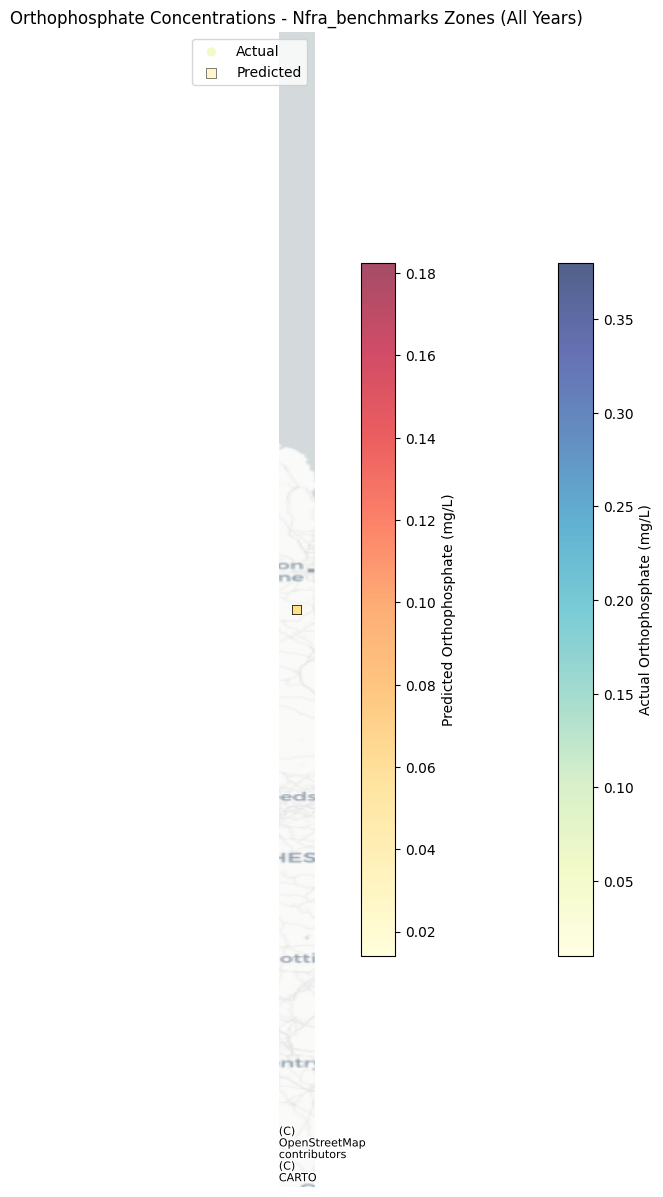

"\nfrom ipywidgets import interact, Dropdown\n@interact(\n    year=Dropdown(options=sorted(gdf_sample['sampleDateOnly'].dt.year.unique())),\n    classification=Dropdown(options=['rainfall', 'nfra', 'wfd', 'bfi'])\n)\ndef interactive_plot(year, classification):\n   return plot_comparison_map(gdf_sample, year=year, classification=classification)\n"

In [75]:
# 4. Generate Visualizations --------------------------------------------------

gdf_sample = gdf.sample(frac=0.9, random_state=41)
gdf_sample = gdf

# 4.1 Comparative Map (Actual vs Predicted)
fig_comparison = plot_comparison_map(gdf_sample, classification='nfra_benchmarks')

# 4.2 Temporal Facet Plots
#fig_temporal = create_temporal_facet_plot(gdf_sample, classification='wfd_urban')

# 4.3 Save Outputs
#fig_comparison.savefig('orthophosphate_comparison_map.png', dpi=300, bbox_inches='tight')
#fig_temporal.savefig('orthophosphate_temporal_facets.png', dpi=300, bbox_inches='tight')

plt.show()

"""
from ipywidgets import interact, Dropdown
@interact(
    year=Dropdown(options=sorted(gdf_sample['sampleDateOnly'].dt.year.unique())),
    classification=Dropdown(options=['rainfall', 'nfra', 'wfd', 'bfi'])
)
def interactive_plot(year, classification):
   return plot_comparison_map(gdf_sample, year=year, classification=classification)
"""